# 1. Install and import require packages for EDA

In [93]:
# install require packages
!pip install pandas
!pip install country_converter
!pip install plotly
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'C:\Users\ad\PycharmProjects\RS\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ad\PycharmProjects\RS\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ad\PycharmProjects\RS\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ad\PycharmProjects\RS\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ad\PycharmProjects\RS\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [94]:
# import require packages

import pandas as pd
import numpy as np
import country_converter as coco
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load dataset as dataframes

In [95]:
# data paths
book_hist_path = '../book_crossing/book_history.dat'
book_rate_path = '../book_crossing/book_ratings.dat'
items_info_path = '../book_crossing/items_info.dat'
users_info_path = '../book_crossing/users_info.dat'

In [96]:
book_hist_df = pd.read_csv(book_hist_path, delimiter='\t', header=None, low_memory=False, na_values=np.nan)
print(book_hist_df.head())

      0     1         2
0  user  item  accessed
1     1   152         1
2     1   153         1
3     1  2176         1
4     1   154         1


In [97]:
book_rate_df = pd.read_csv(book_rate_path, delimiter='\t', low_memory=False)
print(book_rate_df.head())

   user  item  rating
0     1  6264     7.0
1     1  4350     7.0
2     1  6252     5.0
3     1   202     9.0
4     1  6266     6.0


In [98]:
user_info_df = pd.read_csv(users_info_path, delimiter='\t', index_col=None, na_values=np.nan)

In [99]:
print(user_info_df.columns)

Index(['User-ID', 'Location', 'Age'], dtype='object')


In [100]:
user_info_df.head(10)

,User-ID,Location,Age
0,1,"minneapolis, minnesota, usa",24
1,2,"san diego, california, usa",20
2,3,"novinger, missouri, usa",16
3,4,"sonoma, california, usa",34
4,5,"berkeley, california, usa",23
5,6,"king of prussia, ,",36
6,7,"berkeley, ,",22
7,8,"rennes, bretagne, france",22
8,9,"st. louis, missouri, usa",36
9,10,"minneapolis, minnesota, usa",26


In [101]:
items_info_df = pd.read_csv(items_info_path, delimiter='\t')

print(items_info_df.head())

   Book_ID        ISBN                                         Book-Title  \
0        1  0060973129                               Decision in Normandy   
1        2  0393045218                             The Mummies of Urumchi   
2        3  0425176428  What If?: The World's Foremost Military Histor...   
3        4  0452264464               Beloved (Plume Contemporary Fiction)   
4        5  0609804618  Our Dumb Century: The Onion Presents 100 Years...   

       Book-Author Year-Of-Publication                  Publisher  \
0     Carlo D'Este                1991            HarperPerennial   
1  E. J. W. Barber                1999  W. W. Norton &amp Company   
2    Robert Cowley                2000   Berkley Publishing Group   
3    Toni Morrison                1994                      Plume   
4        The Onion                1999         Three Rivers Press   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0060973129.0...   
1  http://

In [102]:
print(items_info_df.columns)

Index(['Book_ID', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


# 3. EDA

## 3.1  Exploring USER INFO

In [103]:
# get number of users
print(user_info_df.shape)
print(user_info_df.columns)
print(user_info_df.head())

(2946, 3)
Index(['User-ID', 'Location', 'Age'], dtype='object')
   User-ID                     Location  Age
0        1  minneapolis, minnesota, usa   24
1        2   san diego, california, usa   20
2        3      novinger, missouri, usa   16
3        4      sonoma, california, usa   34
4        5    berkeley, california, usa   23


##### >> Total: 2946 users, each user has 3 attributes: 'User-ID', 'Location', 'Age'.

#### 3.1.1. Explore Age from users info

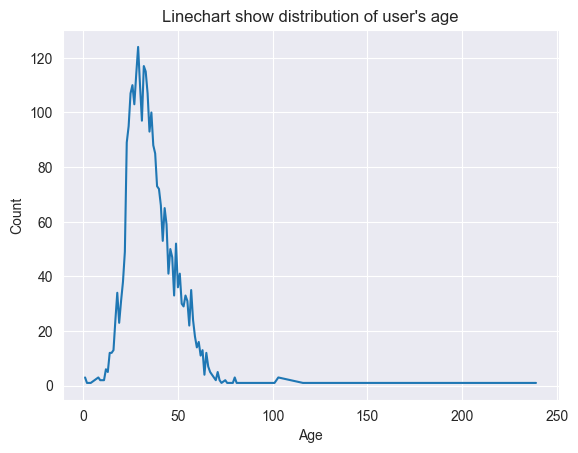

In [104]:
# Show distribution of use's ages
# count age
user_counts = user_info_df['Age'].value_counts().sort_index()

# get age and user count
ages = user_counts.index.tolist()
counts = user_counts.values.tolist()

# Plot linechart
plt.plot(ages, counts)

# Set title, labels
plt.title("Linechart show distribution of user's age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

In [105]:
# Print out age values
print(sorted(user_info_df.Age.unique()))

[1, 2, 4, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 90, 100, 101, 103, 116, 136, 148, 168, 201, 204, 239]


##### >> 'Age' columns no have any null values, and have some value very high, more than 100.

##### // As we see, people who are less than 5 years old or more than 90 years old usually can't rate books much, so in this case we will replace them with nan values.

In [106]:
user_info_df.loc[(user_info_df.Age > 90) | (user_info_df.Age < 5), 'Age'] = np.nan

In [107]:
print(user_info_df[(user_info_df.Age > 90) | (user_info_df.Age < 5)])

Empty DataFrame
Columns: [User-ID, Location, Age]
Index: []


In [108]:
print(user_info_df[user_info_df['Age'] == np.nan])

Empty DataFrame
Columns: [User-ID, Location, Age]
Index: []


##### Replace nan values in Age column with mean()

In [109]:
user_info_df['Age'] = user_info_df['Age'].fillna(user_info_df['Age'].mean())

In [110]:
user_info_df.head()

,User-ID,Location,Age
0,1,"minneapolis, minnesota, usa",24.0
1,2,"san diego, california, usa",20.0
2,3,"novinger, missouri, usa",16.0
3,4,"sonoma, california, usa",34.0
4,5,"berkeley, california, usa",23.0


In [111]:
# convert type 'Age' to integer
user_info_df['Age'] = user_info_df['Age'].astype(int)

In [112]:
user_info_df.head()

,User-ID,Location,Age
0,1,"minneapolis, minnesota, usa",24
1,2,"san diego, california, usa",20
2,3,"novinger, missouri, usa",16
3,4,"sonoma, california, usa",34
4,5,"berkeley, california, usa",23


#### 3.1.2. Explore User's Location

In [113]:
# explore countries from location
countries = []
user_info_df['Country'] = user_info_df['Location'].apply(lambda x: x.split(',')[-1])
# countries.append(add[-1] for add in addresses)

In [114]:
print(user_info_df.head())

   User-ID                     Location  Age Country
0        1  minneapolis, minnesota, usa   24     usa
1        2   san diego, california, usa   20     usa
2        3      novinger, missouri, usa   16     usa
3        4      sonoma, california, usa   34     usa
4        5    berkeley, california, usa   23     usa


In [115]:
# print out all location from all users
locations = sorted(user_info_df.Location.unique())
countries = sorted(user_info_df.Country.unique())

print(f'We have total: {len(locations)} locations')
print(f'We have total: {len(countries)} countries')

We have total: 1799 locations
We have total: 48 countries


##### >> So, we have 1799 unique locations from 2946 users in dataset

In [116]:
print(user_info_df['Country'].value_counts())

Country
 usa                    2128
 canada                  284
 united kingdom          113
                          72
 australia                54
 germany                  49
 portugal                 35
 spain                    33
 france                   31
 malaysia                 24
 netherlands              22
 austria                  10
 finland                   9
 switzerland               8
 romania                   6
 new zealand               6
 singapore                 5
 philippines               5
 iran                      5
 brazil                    4
 japan                     4
 italy                     3
 ireland                   3
 denmark                   3
 qatar                     2
 china                     2
 belgium                   2
 dominican republic        2
 norway                    2
 poland                    2
 united state              1
 czech republic            1
 sweden                    1
 phillipines               1
 cypru

#### As we see, top 3 countries has most book reviewers: usa (2128), canada (284), united kingdom(113).

In [117]:
print(user_info_df[user_info_df['Country']==''])

      User-ID                    Location  Age Country
5           6          king of prussia, ,   36        
6           7                 berkeley, ,   22        
40         41        lakeland, tennessee,   60        
83         84              murphysboro, ,   37        
178       179  manchester, new hampshire,   51        
...       ...                         ...  ...     ...
2739     2740        ray, michigan usa, ,   45        
2761     2762                  molalla, ,   45        
2871     2872                     reno, ,   29        
2893     2894                     arco, ,   51        
2895     2896            coconut grove, ,   71        

[72 rows x 4 columns]


##### And has 72 people who we miss about their country name

In [ ]:
converted_country=coco.convert(names=user_info_df["Country"], to="ISO3")
user_info_df["Country"]=converted_country

 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 not found in regex
 not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa not found in regex
 usa

In [ ]:

user_info_df['Country'].loc[user_info_df['Country']=='not found'] = 'USA'

country=user_info_df["Country"].value_counts()

fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of users by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

C:\Users\ad\AppData\Local\Temp\ipykernel_3016\401129640.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

user_info_df['Country'].loc[user_info_df['Country']=='not found'] = 'USA'

country=user_info_df["Country"].value_counts()

fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of users by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

C:\Users\ad\AppData\Local\Temp\ipykernel_3016\401129640.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
user_info_df
print(user_info_df['Country'].value_counts())

Country
not found    2204
CAN           284
GBR           113
AUS            54
DEU            49
PRT            35
ESP            33
FRA            31
MYS            24
NLD            22
AUT            10
FIN             9
CHE             8
ROU             6
NZL             6
IRN             5
SGP             5
PHL             5
BRA             4
JPN             4
DNK             3
IRL             3
ITA             3
DOM             2
POL             2
NOR             2
QAT             2
BEL             2
CHN             2
SWE             1
CYP             1
CZE             1
EGY             1
ISL             1
USA             1
RUS             1
ZAF             1
KWT             1
MMR             1
HKG             1
TWN             1
BGR             1
TTO             1
Name: count, dtype: int64


##  3.2  Explore ITEM INFO

In [ ]:
print(items_info_df.head())

   Book_ID        ISBN                                         Book-Title  \
0        1  0060973129                               Decision in Normandy   
1        2  0393045218                             The Mummies of Urumchi   
2        3  0425176428  What If?: The World's Foremost Military Histor...   
3        4  0452264464               Beloved (Plume Contemporary Fiction)   
4        5  0609804618  Our Dumb Century: The Onion Presents 100 Years...   

       Book-Author Year-Of-Publication                  Publisher  \
0     Carlo D'Este                1991            HarperPerennial   
1  E. J. W. Barber                1999  W. W. Norton &amp Company   
2    Robert Cowley                2000   Berkley Publishing Group   
3    Toni Morrison                1994                      Plume   
4        The Onion                1999         Three Rivers Press   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0060973129.0...   
1  http://

In [ ]:
# describe item info df
items_info_df.describe()

,Book_ID
count,17384.000000
mean,8692.500000
std,5018.472875
min,1.000000
25%,4346.750000
50%,8692.500000
75%,13038.250000
max,17384.000000


In [ ]:
items_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book_ID              17384 non-null  int64 
 1   ISBN                 17384 non-null  object
 2   Book-Title           17384 non-null  object
 3   Book-Author          17384 non-null  object
 4   Year-Of-Publication  17384 non-null  object
 5   Publisher            17384 non-null  object
 6   Image-URL-S          17384 non-null  object
 7   Image-URL-M          17383 non-null  object
 8   Image-URL-L          17377 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# check null values in item info
items_info_df.isnull().sum()

Book_ID                0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            1
Image-URL-L            7
dtype: int64

In [ ]:
# check null values in item info
items_info_df.isnull().sum()

Book_ID                0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            1
Image-URL-L            7
dtype: int64

In [ ]:
# # convert 'Year-Of-Publication' values to numeric, if cannnot convert, this value cell will be np.nan
# items_info_df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')

In [121]:
items_info_df

,Book_ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
1,2,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
2,3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
3,4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
4,5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...
...,...,...,...,...,...,...,...,...,...
17379,17380,0449209202,Guide to Confident Living,Norman Vincent Peale,1985,Fawcett Books,http://images.amazon.com/images/P/0449209202.0...,http://images.amazon.com/images/P/0449209202.0...,http://images.amazon.com/images/P/0449209202.0...
17380,17381,2209014026,Ludwig Feuerbach,F. Engels,1976,La Dispute,http://images.amazon.com/images/P/2209014026.0...,http://images.amazon.com/images/P/2209014026.0...,http://images.amazon.com/images/P/2209014026.0...
17381,17382,070892722X,To Bring You Joy (Ulverscroft Large Print Series),Essie Summers,1992,Ulverscroft Large Print,http://images.amazon.com/images/P/070892722X.0...,http://images.amazon.com/images/P/070892722X.0...,http://images.amazon.com/images/P/070892722X.0...
17382,17383,1570031843,Like Unto Like: A Novel (Southern Classics Ser...,Katherine Sherwood Bonner McDowell,1997,University of South Carolina Press,http://images.amazon.com/images/P/1570031843.0...,http://images.amazon.com/images/P/1570031843.0...,http://images.amazon.com/images/P/1570031843.0...


In [125]:
book_title_df = pd.DataFrame(items_info_df["Book-Title"].value_counts())

In [129]:
# top 5 book's title
book_title_df.head()

,count
Book-Title,
Wuthering Heights,6
Pet Sematary,6
"The Subtle Knife (His Dark Materials, Book 2)",5
Island,4
The Secret Life of Bees,4


In [130]:
def plot_top_values(df, column, title, x_label, y_label, top=20, template = 'plotly_dark'):
    
    pl = df[column].value_counts().head(top)
    fig = px.bar(y=pl.values, 
                 x=pl.index, 
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 text=pl.values,
                 title= title,
                 template= template)
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        font = dict(size=15,family="Franklin Gothic"))
    fig.show()

In [132]:
plot_top_values(items_info_df, 'Year-Of-Publication', 'Top 20 years in which books were published in terms of count', "Year", "Count")

In [133]:
# as we see, number of books were published increasing every year

In [134]:
print(items_info_df['Year-Of-Publication'].unique())

['1991' '1999' '2000' '1994' '2001' '2003' '1997' '1996' '1998' '1988'
 '2002' '1993' '1982' '1992' '1995' '1980' '1983' '1952' '1987' '2004'
 '1986' '1984' '0' '1981' '1968' '1961' '1958' '1990' '1985' '1974' '1976'
 '1989' '1977' '1978' '1971' '1973' '1960' '1975' '1962'
 'Baldini&amp Castoldi' '1979' '1972' '1956' '1970' '1953' '1942' '1963'
 '1965' 'Bantam Books' '1969' '1954' '1950' '1966' '1957' '1964' '1955'
 '1920' '1946' '1937' '1925' '1967' '1948' '1951' '1959' '1938' '2005'
 '1940' 'Hutchinson'
 'http://images.amazon.com/images/P/0451404874.01.THUMBZZZ.jpg' '1928'
 '1927' '2050' '1923']


In [135]:
print(items_info_df[items_info_df['Year-Of-Publication']=='Hutchinson'].index)
print(items_info_df[items_info_df['Year-Of-Publication']=='Baldini&amp Castoldi'].index)
print(items_info_df[items_info_df['Year-Of-Publication']=='Bantam Book'].index)
print(items_info_df[items_info_df['Year-Of-Publication']=='http://images.amazon.com/images/P/0451404874.01.THUMBZZZ.jpg'].index)

Index([13444], dtype='int64')
Index([621], dtype='int64')
Index([], dtype='int64')
Index([13550], dtype='int64')


In [136]:
items_info_df = items_info_df.drop(items_info_df[items_info_df['Year-Of-Publication']=='Hutchinson'].index)
items_info_df = items_info_df.drop(items_info_df[items_info_df['Year-Of-Publication']=='Baldini&amp Castoldi'].index)
items_info_df = items_info_df.drop(items_info_df[items_info_df['Year-Of-Publication']=='http://images.amazon.com/images/P/0451404874.01.THUMBZZZ.jpg'].index)

In [137]:
items_info_df["Book-Author"] = items_info_df["Book-Author"].apply(lambda x: x.strip())

In [138]:
print(items_info_df["Book-Author"].unique())

["Carlo D'Este" 'E. J. W. Barber' 'Robert Cowley' ... 'F. Engels'
 'Essie Summers' 'Katherine Sherwood Bonner McDowell']


In [139]:
print(items_info_df[items_info_df["Publisher"]=='1stBooks Library'])

       Book_ID        ISBN                                         Book-Title  \
33          34  1414035004  The Adventures of Drew and Ellie: The Magical ...   
2716      2717  1410798860  The Diary of Alice Mary: A Factual Childhood D...   
4703      4704  140332557X  The Little Guide to Happiness: How to Smile Again   
10080    10081  1410744310   Lost in the Rain II: Poetry and Quotes to Ponder   
10290    10291  1588204030  $oft Money: The True Power in Our Nation's Cap...   
11239    11240  1410716856                              Starlight, Starbright   
11602    11603  141401354X                                  Ocean of the Dead   
13198    13199  1410785971             The Story in the Little Brown Suitcase   

                     Book-Author Year-Of-Publication         Publisher  \
33                Charles Noland                2003  1stBooks Library   
2716    Alice Mary Connally Fisk                2003  1stBooks Library   
4703       Michael Kevin Naselli                

## 3.3 EXPLORE with RATING INFO

In [140]:
book_rate_df.head()

,user,item,rating
0,1,6264,7.0
1,1,4350,7.0
2,1,6252,5.0
3,1,202,9.0
4,1,6266,6.0


In [141]:
print(book_rate_df.describe())

               user          item        rating
count  62656.000000  62656.000000  62656.000000
mean    1458.705056   6106.118839      7.953700
std      848.564252   4847.444402      1.717846
min        1.000000      1.000000      1.000000
25%      760.000000   1888.000000      7.000000
50%     1398.000000   4977.000000      8.000000
75%     2218.000000   9538.000000      9.000000
max     2945.000000  17384.000000     10.000000


In [142]:
print(book_rate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62656 entries, 0 to 62655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    62656 non-null  int64  
 1   item    62656 non-null  int64  
 2   rating  62656 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


In [143]:
print(book_rate_df['rating'].unique())

[ 7.  5.  9.  6.  8. 10.  4.  3.  1.  2.]


In [144]:
print(book_rate_df['rating'].value_counts())

rating
8.0     15629
10.0    13884
9.0     12008
7.0      9906
5.0      5183
6.0      4236
4.0       859
3.0       552
2.0       239
1.0       160
Name: count, dtype: int64


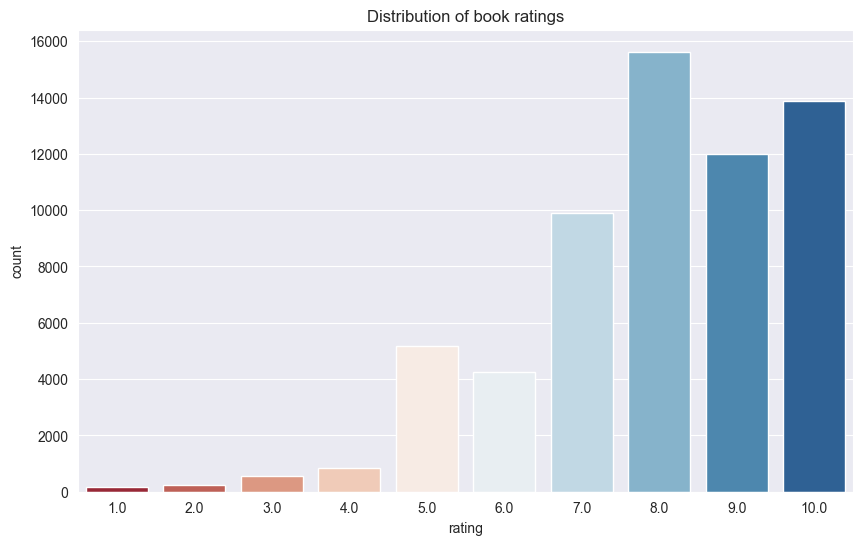

In [145]:
# Distritution of ratings
palette = sns.color_palette("RdBu", 10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='rating', data=book_rate_df, palette=palette)
ax.set_title('Distribution of book ratings')

plt.show()

In [146]:
book_rate_df = book_rate_df.rename(columns={'user': 'User-ID',
                                                      'item': 'Book-ID'})
items_info_df = items_info_df.rename(columns={'Book_ID': 'Book-ID'})

user_group = book_rate_df.groupby("User-ID")
item_group = book_rate_df.groupby("Book-ID")


average_user_rating = user_group["rating"].mean()
number_of_ratings_by_user = user_group["rating"].count()
average_book_rating = item_group["rating"].mean()
number_of_book_ratings = item_group["rating"].count()

average_user_rating.name = "avg_rating"
number_of_ratings_by_user.name = "n_ratings"
average_book_rating.name = "avg_rating"
number_of_book_ratings.name = "n_ratings"

In [147]:
average_user_rating

User-ID
1        8.062500
2        9.282051
5        8.500000
7        7.045455
9        7.040000
          ...    
2937     8.662500
2939    10.000000
2942     7.250000
2943     7.956522
2945     7.166667
Name: avg_rating, Length: 1295, dtype: float64

In [148]:
# join ratings info with users info and items info
user_info_df = user_info_df.join(number_of_ratings_by_user, on="User-ID")
user_info_df = user_info_df.join(average_user_rating, on="User-ID")

items_info_df = items_info_df.join(number_of_book_ratings, on="Book-ID")
items_info_df = items_info_df.join(average_book_rating, on="Book-ID")

# fill na values of number rating with zero
user_info_df["n_ratings"] = user_info_df["n_ratings"].fillna(0)
items_info_df["n_ratings"] = items_info_df["n_ratings"].fillna(0)

# convert to integer
user_info_df["n_ratings"] = user_info_df["n_ratings"].astype(int)
items_info_df["n_ratings"] = items_info_df["n_ratings"].astype(int)

In [149]:
user_info_df.head()

,User-ID,Location,Age,Country,n_ratings,avg_rating
0,1,"minneapolis, minnesota, usa",24,USA,32,8.062500
1,2,"san diego, california, usa",20,USA,39,9.282051
2,3,"novinger, missouri, usa",16,USA,0,NaN
3,4,"sonoma, california, usa",34,USA,0,NaN
4,5,"berkeley, california, usa",23,USA,30,8.500000


In [150]:
items_info_df.head()

,Book-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,n_ratings,avg_rating
0,1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1,6.000000
1,2,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,3,8.333333
2,3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,4,8.750000
3,4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,32,7.750000
4,5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,22,7.818182


In [151]:
def draw_top_chart(data, x, y_list, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    plt.xticks(rotation=90)

    palette = sns.color_palette("RdBu", len(data))

    sns.barplot(x=x, y=y_list[0], data=data, palette=palette, ax=ax1)
    ax1.set_title(title)

    ax2 = ax1.twinx()
    sns.scatterplot(x=x, y=y_list[1], data=data, color='black', ax=ax2)

    plt.show()

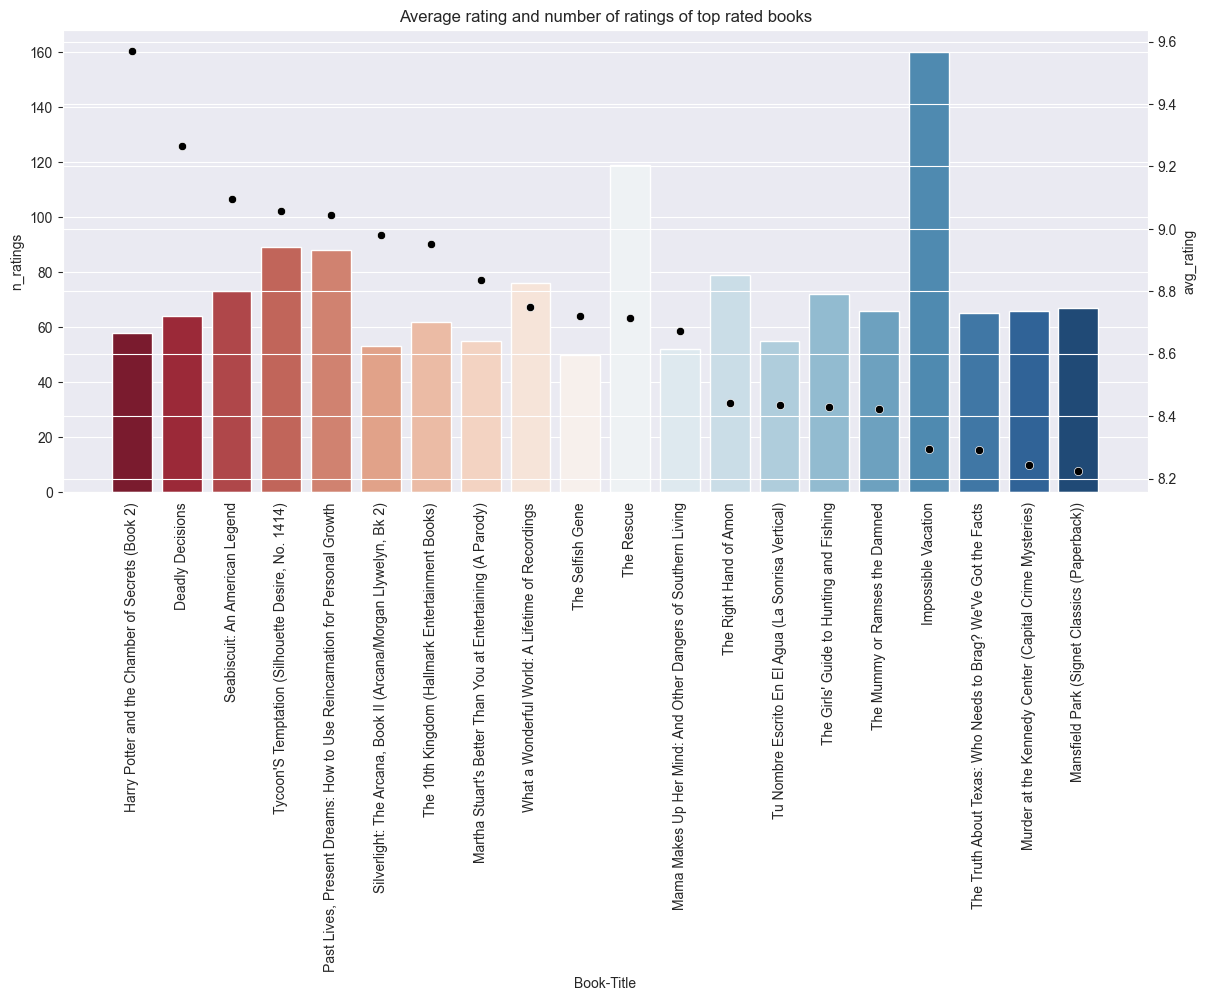

In [152]:
titles_top_rated = items_info_df.sort_values('avg_rating', ascending=False)
titles_top_rated = titles_top_rated[titles_top_rated['n_ratings']>=50].head(20)

draw_top_chart(titles_top_rated, 'Book-Title', ['n_ratings', 'avg_rating'], 'Average rating and number of ratings of top rated books')

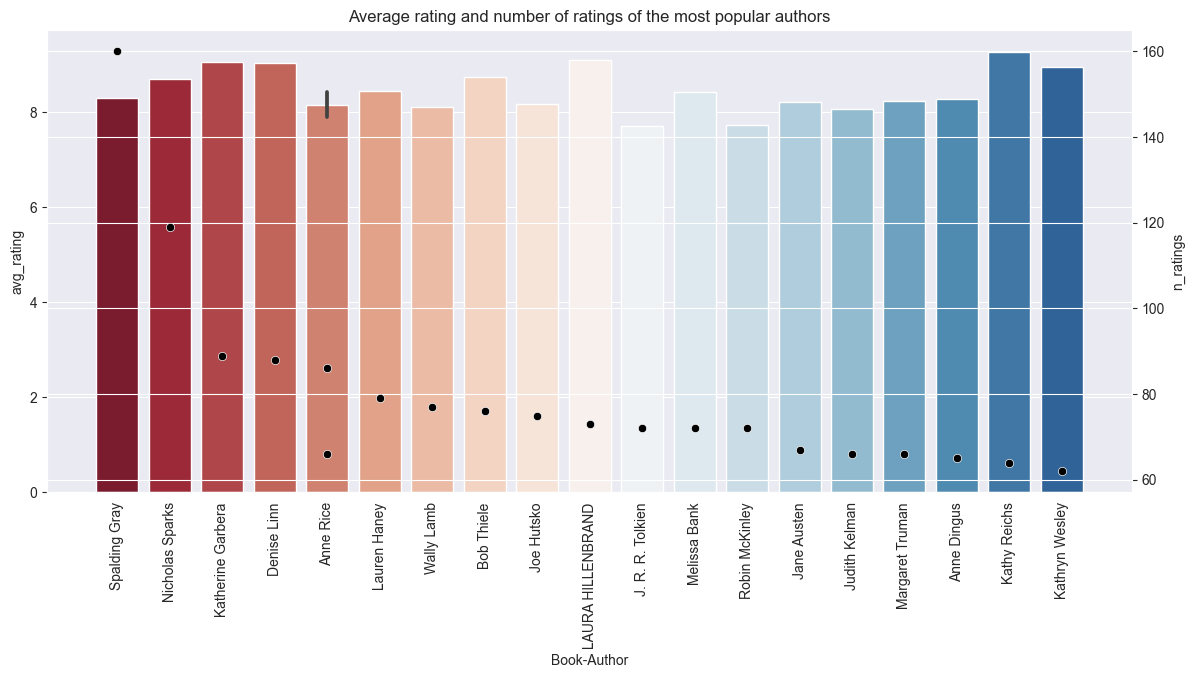

In [153]:
authors_top_popular = items_info_df.sort_values('n_ratings', ascending=False).head(20)
draw_top_chart(authors_top_popular, 'Book-Author', ['avg_rating', 'n_ratings'], 'Average rating and number of ratings of the most popular authors')

In [154]:
print(book_rate_df[book_rate_df['User-ID']==1])

    User-ID  Book-ID  rating
0         1     6264     7.0
1         1     4350     7.0
2         1     6252     5.0
3         1      202     9.0
4         1     6266     6.0
5         1     4810     5.0
6         1     6251     9.0
7         1      160     9.0
8         1      161     8.0
9         1      631    10.0
10        1     6244     7.0
11        1     6260     8.0
12        1     6229    10.0
13        1     2072     9.0
14        1     6254     8.0
15        1     1514     9.0
16        1     2566     9.0
17        1     1714     9.0
18        1     1893     9.0
19        1     2955     9.0
20        1     2565     9.0
21        1     2864     8.0
22        1     5988     6.0
23        1      164     7.0
24        1     1119     9.0
25        1      167     8.0
26        1     6265     8.0
27        1     1440     9.0
28        1     1427     9.0
29        1     5404     8.0
30        1      259     7.0
31        1     4156     8.0


In [157]:
print(items_info_df[items_info_df['Book-ID']==6264])

      Book-ID        ISBN                       Book-Title   Book-Author  \
6263     6264  0553280325  Something Wicked This Way Comes  Ray Bradbury   

     Year-Of-Publication Publisher  \
6263                1983    Bantam   

                                            Image-URL-S  \
6263  http://images.amazon.com/images/P/0553280325.0...   

                                            Image-URL-M  \
6263  http://images.amazon.com/images/P/0553280325.0...   

                                            Image-URL-L  n_ratings  avg_rating  
6263  http://images.amazon.com/images/P/0553280325.0...          4        8.75  
